# Data cleaning and preprocessing

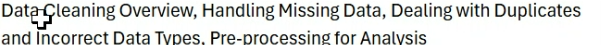

In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = {
    'Name':['Alice','Bob','Charlie','David','Emma','Freddy','George','Han','Ian','Freddy'],
    'Age':[20,21,23,25,20,None,39,34,23,12],
    'Grade':['C','A','B','A','C','D','A','B','B','A']
}

In [43]:
# df = pd.read_csv("customer_purchases.csv")
df = pd.DataFrame(data)
df.head()

,Name,Age,Grade
0,Alice,20.0,C
1,Bob,21.0,A
2,Charlie,23.0,B
3,David,25.0,A
4,Emma,20.0,C


In [44]:
df.isna()

,Name,Age,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,True,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [45]:
df.describe()

,Age
count,9.000000
mean,24.111111
std,8.006941
min,12.000000
25%,20.000000
50%,23.000000
75%,25.000000
max,39.000000


In [46]:
df.fillna({"Age": df["Age"].median()}, inplace=True)
df

,Name,Age,Grade
0,Alice,20.0,C
1,Bob,21.0,A
2,Charlie,23.0,B
3,David,25.0,A
4,Emma,20.0,C
5,Freddy,23.0,D
6,George,39.0,A
7,Han,34.0,B
8,Ian,23.0,B
9,Freddy,12.0,A


In [47]:
df.fillna({'Age':df['Age'].mean()}, inplace=True)
df

,Name,Age,Grade
0,Alice,20.0,C
1,Bob,21.0,A
2,Charlie,23.0,B
3,David,25.0,A
4,Emma,20.0,C
5,Freddy,23.0,D
6,George,39.0,A
7,Han,34.0,B
8,Ian,23.0,B
9,Freddy,12.0,A


In [48]:
df.drop_duplicates(inplace=True) # will only drop is all the values are duplicated, huh
df

,Name,Age,Grade
0,Alice,20.0,C
1,Bob,21.0,A
2,Charlie,23.0,B
3,David,25.0,A
4,Emma,20.0,C
5,Freddy,23.0,D
6,George,39.0,A
7,Han,34.0,B
8,Ian,23.0,B
9,Freddy,12.0,A


In [49]:
df['Age']

0    20.0
1    21.0
2    23.0
3    25.0
4    20.0
5    23.0
6    39.0
7    34.0
8    23.0
9    12.0
Name: Age, dtype: float64

In [50]:
df['Age'].astype(int) # we can convert the type like this

0    20
1    21
2    23
3    25
4    20
5    23
6    39
7    34
8    23
9    12
Name: Age, dtype: int32

## On a (kinda) real dataset

In [ ]:
df = pd.read_csv('data/CustomerPurchase.csv')
df.head()

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


In [52]:
df.describe()

,Customer ID,Age
count,50.00000,50.000000
mean,1045.50000,54.160000
std,14.57738,25.658161
min,1021.00000,15.000000
25%,1033.25000,30.250000
50%,1045.50000,57.000000
75%,1057.75000,74.000000
max,1070.00000,98.000000


In [53]:
# First we remove the age of anyone > 75 and replace it with the mean
df['Age'] = df['Age'].map(lambda x:x if x<75 else np.nan)
df.describe()

,Customer ID,Age
count,50.00000,39.000000
mean,1045.50000,44.743590
std,14.57738,20.378934
min,1021.00000,15.000000
25%,1033.25000,26.000000
50%,1045.50000,45.000000
75%,1057.75000,62.500000
max,1070.00000,74.000000


In [54]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head(10)

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30.0,Female,School,Average,No
1,1022,68.0,Female,UG,Poor,No
2,1023,70.0,Female,PG,Good,No
3,1024,72.0,Female,PG,Good,No
4,1025,16.0,Female,UG,Average,No
5,1026,31.0,Female,School,Average,Yes
6,1027,18.0,Male,School,Good,No
7,1028,60.0,Female,School,Poor,Yes
8,1029,65.0,Female,UG,Average,No
9,1030,74.0,Male,UG,Good,Yes


In [55]:
df.drop_duplicates()
df.head()

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30.0,Female,School,Average,No
1,1022,68.0,Female,UG,Poor,No
2,1023,70.0,Female,PG,Good,No
3,1024,72.0,Female,PG,Good,No
4,1025,16.0,Female,UG,Average,No


In [56]:
df['Purchased'] = df['Purchased'].map(lambda x:0 if x=='No' else 1)
df.head(10)

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30.0,Female,School,Average,0
1,1022,68.0,Female,UG,Poor,0
2,1023,70.0,Female,PG,Good,0
3,1024,72.0,Female,PG,Good,0
4,1025,16.0,Female,UG,Average,0
5,1026,31.0,Female,School,Average,1
6,1027,18.0,Male,School,Good,0
7,1028,60.0,Female,School,Poor,1
8,1029,65.0,Female,UG,Average,0
9,1030,74.0,Male,UG,Good,1


In [ ]:
edf = pd.read_csv('data/sales_data.csv')
edf.head()

,Date,Product_Category,Region,Sales,Quantity,Customer_Age
0,2023-01-01,Electronics,North,1200,5,28
1,2023-01-02,Clothing,South,800,10,34
2,2023-01-03,Electronics,East,1500,3,45
3,2023-01-04,Home & Kitchen,West,900,7,29
4,2023-01-05,Clothing,North,600,12,52


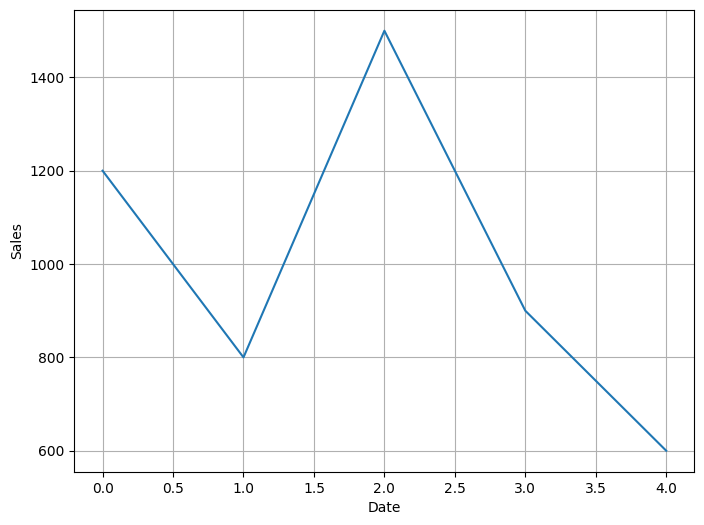

In [60]:
plt.figure(figsize=(8,6))
plt.plot(edf['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [62]:
# sales_by_category = edf['Sales'].aggregate(edf['Product_Category'])

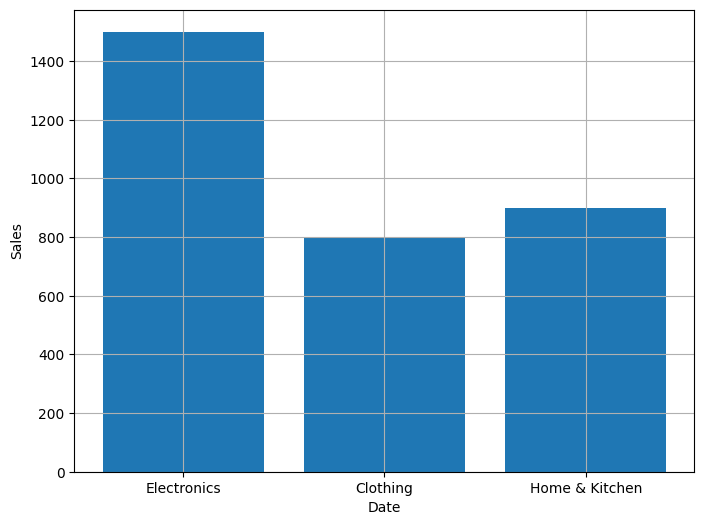

In [64]:
plt.figure(figsize=(8, 6))
plt.bar(edf['Product_Category'], edf["Sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.show()

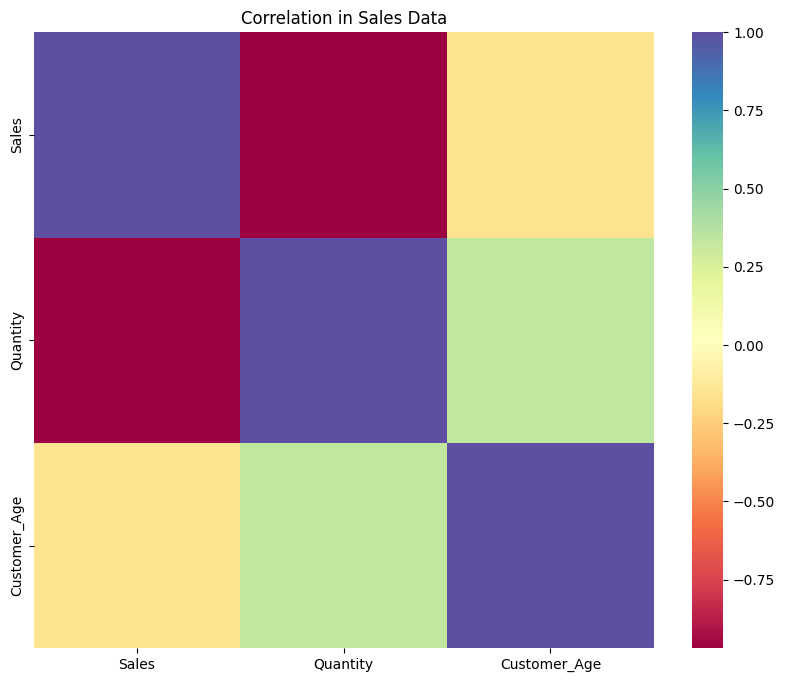

In [70]:
correlation = edf.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cmap='Spectral')
plt.title('Correlation in Sales Data')
plt.savefig('correlation_heatmap.png', dpi = 300, format='png')
plt.show()

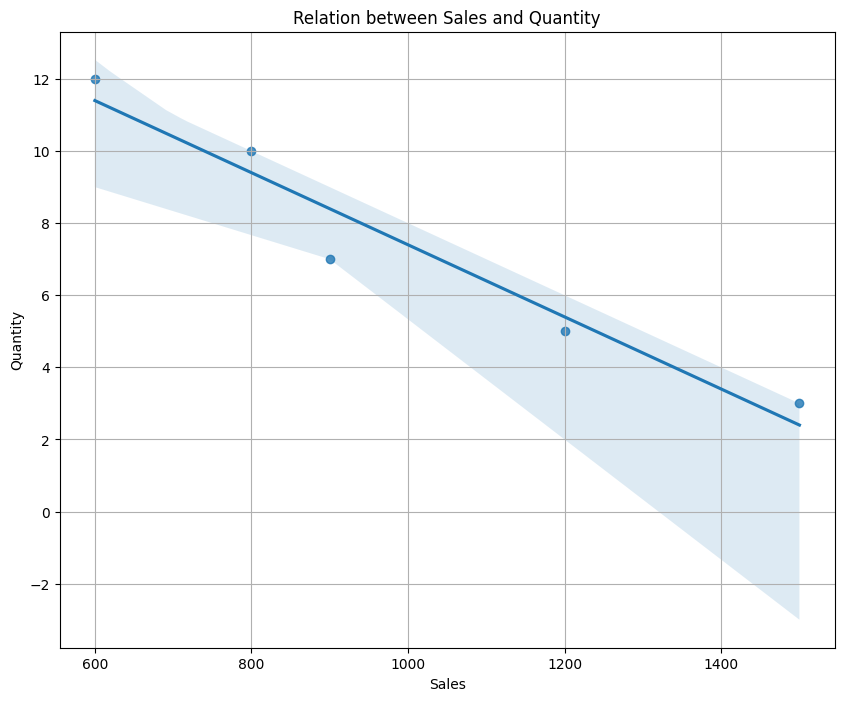

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
sns.regplot(x=edf['Sales'], y=edf['Quantity'])
plt.title('Relation between Sales and Quantity')
plt.xlabel('Sales')
plt.ylabel('Quantity')
plt.grid()
plt.show()
# plt.savefig('Sales_vs_Quantity.png', dpi=300)

Signature: plt.savefig(*args, **kwargs) -> 'None'
Docstring:
Save the current figure.

Call signature::

  savefig(fname, *, transparent=None, dpi='figure', format=None,
          metadata=None, bbox_inches=None, pad_inches=0.1,
          facecolor='auto', edgecolor='auto', backend=None,
          **kwargs
         )

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or binary file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If *format* is not
    set and *fname* has